In [76]:
import numpy as np
from hmmlearn import hmm
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap

In [2]:
# defining matrixes
np.random.seed(42)
components = 6
delta = 0.05
m = 5
startprob = np.array([1, 0, 0, 0, 0, 0])
transtprob = np.array([[0.1, 0.9, 0, 0, 0, 0],
                        [0.2, 0, 0.1+delta, 0, 0, 0.7-delta],
                        [0, 0.5, 0, 0.5, 0, 0],
                        [0, 0, 0.5, 0.5, 0, 0],
                        [0, 0, 0.1, 0, 0.4, 0.5],
                        [0, 0.2, 0, 0, 0.7, 0.1]])
emissionprob = np.array([[0.25, 0.25, 0.25, 0.25],
                         [0.4, 0.3, 0.2, 0.1],
                         [0.4, 0.4, 0.1, 0.1],
                         [0.3, 0.3, 0.3, 0.1],
                         [0.2, 0.2, 0.2, 0.4],
                         [0.2, 0.2, 0.3, 0.3]
                         ])


In [3]:
# model instatiation
model = hmm.CategoricalHMM(n_components=components)
model.startprob_=startprob
model.transmat_ = transtprob
model.emissionprob_ = emissionprob

In [5]:
def observation_sample(model_gen, k = 10):
    O, Q = model_gen.sample(k*2)
    observations = O[np.arange(0,2*k,2)].flatten()
    return observations, Q

In [13]:
obs, real_states= observation_sample(model_gen=model, k=200)

In [4]:
# definition of Viterbi alg with obs every other state
def viterbi(obs, components, model):
    T = len(obs)*2
    V = np.zeros((T,components))
    for j in range(components):
        V[0][j] = model.startprob_[j]*model.emissionprob_[j][obs[0]]
    for t in range(1,T):
        for j in range(components):
            if t%2 == 0:
                V[t][j] = max(V[t-1] * model.transmat_[:,j] * model.emissionprob_[j][obs[int(t/2)]])
            else:
                V[t][j] = max(V[t-1] * model.transmat_[:,j])
    optimal_state = np.argmax(V[T-1])
    best_path = [optimal_state]
    for i in range(T-2,-1,-1):
        optimal_state = np.argmax(V[i-1]*model.transmat_[:,optimal_state])
        best_path.append(optimal_state)
    return best_path

In [6]:
def high_states_check(path, m, high_states=[4,5]):
    path_np = np.array(path)
    path_np[path_np>=min(high_states)] = 7
    for i in range(len(path) - m):
        if np.array_equal(path_np[i:i+m], np.array([7]*m)):
            # print("Fuori controllo")
            return True
    return False

In [19]:
high_states_check(viterbi(obs=obs,components=components), m=5)

True

In [10]:
def high_risk_condition(model, components, m, k,n):
    cons_state = []
    for i in range(n):
        obs, real_states= observation_sample(model_gen=model, k=k)
        cons_state.append(high_states_check(viterbi(obs=obs,components=components, model=model), m=m))
    return cons_state

In [51]:
def high_risk_condition_real_states(model,m):
    cons_state=[]
    for i in range(n):
        obs, real_states = observation_sample(model_gen=model, k=k)
        cons_state.append(high_states_check(real_states, m=m))
    return cons_state

In [8]:
# definition of parameters
m = 5
k = 200
n = 100
f = 0.1

In [11]:
states_delta05 = high_risk_condition(model=model, components=components, m=m,k=k,n=n)

In [15]:
def f_critical(risk_list):
    return sum(risk_list) / len(risk_list)

In [13]:
sum(states_delta05)/len(states_delta05)

1.0

In [34]:
# defining matrixes
np.random.seed(42)
components = 6
delta = 0.5
m = 5
startprob = np.array([1, 0, 0, 0, 0, 0])
transtprob = np.array([[0.1, 0.9, 0, 0, 0, 0],
                        [0.2, 0, 0.1+delta, 0, 0, 0.7-delta],
                        [0, 0.5, 0, 0.5, 0, 0],
                        [0, 0, 0.5, 0.5, 0, 0],
                        [0, 0, 0.1, 0, 0.4, 0.5],
                        [0, 0.2, 0, 0, 0.7, 0.1]])
emissionprob = np.array([[0.25, 0.25, 0.25, 0.25],
                         [0.4, 0.3, 0.2, 0.1],
                         [0.4, 0.4, 0.1, 0.1],
                         [0.3, 0.3, 0.3, 0.1],
                         [0.2, 0.2, 0.2, 0.4],
                         [0.2, 0.2, 0.3, 0.3]
                         ])


In [35]:
states_delta2 = high_risk_condition(model=model, components=components, m=m,k=k,n=n,f=f)

In [36]:
states_delta2

[True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True]

In [25]:
# generating data for NN training
def model_gen(delta):
    components = 6
    delta = delta
    m = 5
    startprob = np.array([1, 0, 0, 0, 0, 0])
    transtprob = np.array([[0.1, 0.9, 0, 0, 0, 0],
                        [0.2, 0, 0.1+delta, 0, 0, 0.7-delta],
                        [0, 0.5, 0, 0.5, 0, 0],
                        [0, 0, 0.5, 0.5, 0, 0],
                        [0, 0, 0.1, 0, 0.4, 0.5],
                        [0, 0.2, 0, 0, 0.7, 0.1]])
    emissionprob = np.array([[0.25, 0.25, 0.25, 0.25],
                         [0.4, 0.3, 0.2, 0.1],
                         [0.4, 0.4, 0.1, 0.1],
                         [0.3, 0.3, 0.3, 0.1],
                         [0.2, 0.2, 0.2, 0.4],
                         [0.2, 0.2, 0.3, 0.3]
                         ])
    model = hmm.CategoricalHMM(n_components=components)
    model.transmat_ = transtprob
    model.emissionprob_ = emissionprob
    model.startprob_ = startprob
    return model

In [65]:
data_collector = pd.DataFrame(data={'m':[], 'delta':[], 'f_crit':[]})

In [37]:
data_collector

,m,delta,f_crit


In [38]:
pd.concat([data_collector,pd.DataFrame(data={'m':[], 'delta':[0.5], 'f_crit':[0.8]})])

,m,delta,f_crit
0,7.0,0.5,0.8


In [32]:
data_collector

,m,delta,f_crit,0
0,NaN,NaN,NaN,5.00
1,NaN,NaN,NaN,0.00
2,NaN,NaN,NaN,1.00
0,NaN,NaN,NaN,5.00
1,NaN,NaN,NaN,0.05
...,...,...,...,...
1,NaN,NaN,NaN,0.65
2,NaN,NaN,NaN,0.66
0,NaN,NaN,NaN,5.00
1,NaN,NaN,NaN,0.40


In [66]:
for m in range(5,15):
    for delta in np.arange(0.0,0.71,0.01):
        data_collector = pd.concat([data_collector, pd.DataFrame(data={'m':[m], 'delta':[delta], 'f_crit':[f_critical(high_risk_condition(model=model_gen(delta=delta), components=components, m = m, k =k, n=n))]})])

In [68]:
data_collector.to_csv("multi_factor_analysis.csv", index=False)



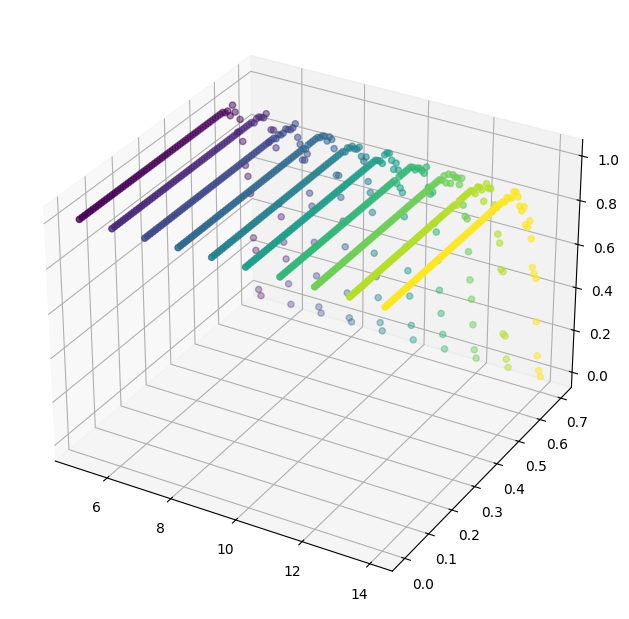

In [75]:
%matplotlib inline
fig = plt.figure(figsize=(6,6))
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)
sc = ax.scatter(xs=data_collector["m"], ys = data_collector["delta"], zs = data_collector["f_crit"], c=data_collector["m"],marker="o")

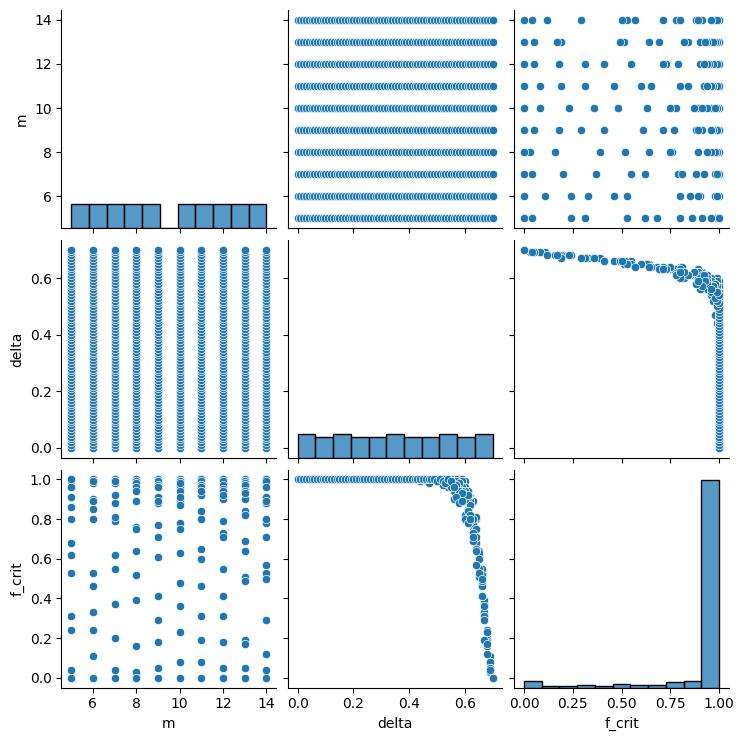

In [77]:
sns.pairplot(data_collector)

In [57]:
data_collector_real_states = pd.DataFrame(data={'m':[], 'delta':[], 'f_crit':[]})

In [62]:
for m in range(5,10):
    for delta in np.arange(0.0,0.70,0.05):
        data_collector_real_states = pd.concat([data_collector_real_states, pd.DataFrame(data={'m':[m], 'delta':[delta], 'f_crit':[f_critical(high_risk_condition_real_states(model=model_gen(delta=delta), m=m))]})])


In [55]:
high_risk_condition_real_states(model = model_gen(delta = 0.5), m = 6)

[True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True]

In [64]:
data_collector_real_states

,m,delta,f_crit
0,5.0,0.00,1.00
0,5.0,0.05,1.00
0,5.0,0.10,1.00
0,5.0,0.15,1.00
0,5.0,0.20,1.00
...,...,...,...
0,9.0,0.45,0.99
0,9.0,0.50,1.00
0,9.0,0.55,0.98
0,9.0,0.60,0.89


In [60]:
f_critical(high_risk_condition_real_states(model = model_gen(delta = 0.69), m = 6))

0.42